In [199]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from seaborn import heatmap
ND=multivariate_normal.pdf#input: x, mean, cov, allow_singular=False)
from sklearn.metrics import classification_report,confusion_matrix
from seaborn import heatmap

In [200]:
Train=np.genfromtxt('Training.csv',skip_header=1,delimiter=',')
Val=np.genfromtxt('Validation.csv',skip_header=1,delimiter=',')

In [224]:
names={'Setosa':0,'Versicolor':1,'Virginica':2}
TrainX=Train[:,0:2]
TrainY=Train[:,2]

ValX=Val[:,0:2]
ValY=Val[:,2]


In [214]:
class NDA:
    def __init__(self, X,Y, dependancy='Gen'):
        self.dependancy=dependancy
        self.X=X
        self.Y=Y
        self.p=np.zeros(3)
        self.mu=np.zeros([3,2])
        self.C=list()
        for l in [0,1,2]:
            loc=np.where(self.Y==l)[0]
            self.p[l]=len(loc)/len(self.Y)
            self.mu[l]=np.mean(self.X[loc],axis=0)
            self.C.append(C_MLE(np.cov(self.X[loc].T),self.dependancy))
            
    def C_MLE(self,C,kind='Gen'):
        if kind=='Gen':
            return C
        if kind=='Ind':
            return np.diag(np.diag(C))
        if kind=='Iso':
            D=len(C)
            return (1/D)*np.matrix.trace(C)*np.identity(D)
        else:
            print(kind,' not reconized please choose either Gen, Indp, or Iso')
    def Predict(self,testX):
        out=[]
        for xi in testX:
            yhat=np.zeros(3)
            for i in [0,1,2]:
                N_d=ND(xi,self.mu[i],self.C[i])
                if N_d>0:
                    yhat[i]=np.log(N_d)+np.log(self.p[i])
                else:
                    yhat[i]=np.nan
            out.append(yhat)
        return np.nanargmax(np.array(out),axis=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       0.95      0.95      0.95        20
         2.0       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



<AxesSubplot:>

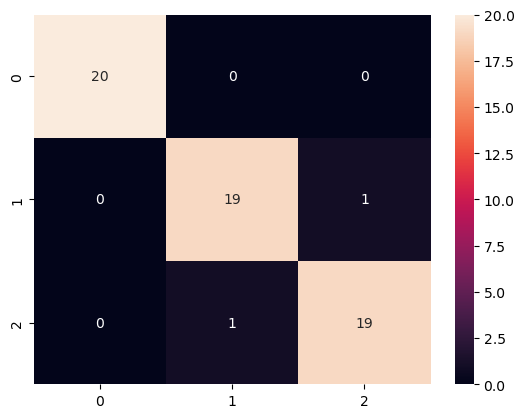

In [233]:
Model1=NDA(TrainX,TrainY)
Y=Model.Predict(ValX)
print(classification_report(ValY,Y))
heatmap(confusion_matrix(ValY, Y),annot=True)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       0.95      0.95      0.95        20
         2.0       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



<AxesSubplot:>

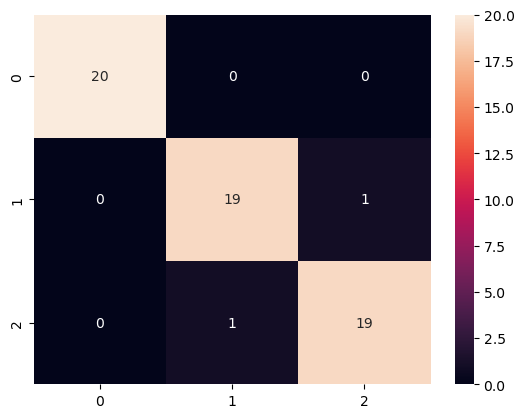

In [234]:
Model1=NDA(TrainX,TrainY,'Ind')
Y=Model.Predict(ValX)
print(classification_report(ValY,Y))
heatmap(confusion_matrix(ValY, Y),annot=True)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       0.95      0.95      0.95        20
         2.0       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



<AxesSubplot:>

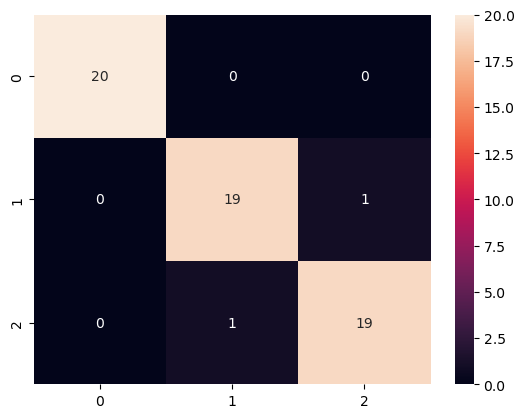

In [235]:
Model1=NDA(TrainX,TrainY,'Iso')
Y=Model.Predict(ValX)
print(classification_report(ValY,Y))
heatmap(confusion_matrix(ValY, Y),annot=True)